# Best Flights: a study of flight prices

# Introduction

Everyone wants to find the cheapest option for their next purchase, whether it is the hottest new tech or a new Christmas sweater for the holidays. In my case, I want to focus on exploring flight prices.

Flight prices intrigue me as an area of research as it applies to many. There were an estimated 22.2 million flights in the year 2021, and as the effects of COVID on the airline industry slowly subside this number will only grow as people start getting back into travel. With this current amount of travel and an inevitable increase, I hope to be able to use data to find the cheapest way to purchase flights in an attempt to shed light on the flight booking industry and help people get the most out of their money.

# Aims and Objectives

I aim to find the cheapest time to fly, by examining flight prices from flight booking websites and comparing different factors.

Some of the questions I have chosen to focus on are:

1. Which day of the week is the cheapest to fly?
2. Which month of the year is it the cheapest to fly?
3. How many days in advance should you book?

# Data

To find the cheapest flight opportunities I have chosen to web-scrape a flight booking service's prices and create an average for each day. Data will be acquired through the flight booking service named Skiplagged. This service provides great url-based flight data and allows simple web scraping through HTML attributes. I have tried two other services, Expedia and Kayak, but both had protections preventing web scraping such as dynamic selectors.

To analyze this data I will create easy-to-read charts that anyone familiar with flying will understand. An example of finding the cheapest day of the week would be a bar chart for the average flight prices on each day.

### Flight Locations

The flight locations I have chosen to focus on are:
- Toronto, Canada to London, England

These locations are of interest to me as I live in Toronto and go to school in London as well as have family in London.

### Format of Requests:

https://skiplagged.com/flights/YTO/LON/2022-12-20
- YTO - flight start location (Toronto)
- LON - flight end location (London)
- 2022-12-20 - date

### Data Ethics

As previously described the data is coming from a website named Skiplagged. According to the website "Use License" in the terms and conditions, permission is granted to view one copy of the materials for personal, non-commercial use. Assuming this means one copy of each material (date, flights, etc) this project should not breach the terms and conditions.

### Data Biases/Flaws

As with any data, there is a potential for biases and flaws. With flight prices, the data can be skewed based on the website, potential advertising, and the place in the world you are trying to go. However I feel these biases will not affect the data in any remarkable way, but it is important to understand them before continuing.



# Web Scraping Flights

### Main Tools

- Selenium - Used to create a fake browser and render each page fully before retrieving the HTML
- BeautifulSoup - Used to scrape the prices from the HTML
- Pandas - Used to store data in a table and create charts from it
- Numpy - Used to create a mean value from the output flight prices

### How

1. Check if there is previous data and use that if it exists
2. Loop through each date on the chrome selenium driver
	1. Wait for the page to load
	2. Grab HTML in BeautifulSoup
	3. Select the prices based on a price CSS selector
	4. Clean each price to be a float and mean out the values
	5. Add date, mean price, day, and month to pandas DataFrame
3. Store to DataFrame if data does not exist

In [2]:
# Importing the necessary libraries
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from datetime import date, datetime, timedelta
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
# if prices file exists from previous scrape, read from that file
if (os.path.exists(os.getcwd() + "/prices.csv")):
    price_by_date = pd.read_csv("./prices.csv")
else:
    # initialize chrome driver
    driver = webdriver.Chrome()

    def get_avg_price_by_date(start_place, end_place, date):
        # create url from search parameters
        url = "https://skiplagged.com/flights/" + \
            start_place + "/" + end_place + "/" + date
        # initialize browser with url
        driver.get(url)
        # sleep to load dynamic content
        time.sleep(8)
        # create soup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # select prices and clean text to float number list
        prices = soup.select("[data-orig-price]")
        prices = [float(price.get_text()[1:]) for price in prices]
        # return mean
        return np.mean(prices)

    # template for dataframe
    data = {
        "date": [],
        "day": [],
        "week": [],
        "month": [],
        "price": [],
    }

    # create date range
    date_range = pd.date_range(start='2023-01-01', end='2023-06-30')

    # loop through dates in range
    for date in date_range:
        format_date = date.strftime("%Y-%m-%d")
        # get average price
        avg_price = get_avg_price_by_date("YTO", "LON", format_date)
        # append cleaned data to dictionary
        data["date"].append(format_date)
        data["price"].append(avg_price)
        data["day"].append(date.isoweekday())
        data["month"].append(date.strftime("%m"))
        data["month"].append(date.isocalendar()[1])

    # create dataframe for easy plotting and table formatting
    price_by_date = pd.DataFrame(data)
    # change index to date
    price_by_date.set_index("date", inplace=True)

    # save to csv for quick use
    price_by_date.to_csv("./prices.csv")

    # close driver
    driver.quit()

# First ten rows of data
price_by_date.head(10)


,date,day,month,price
0,2023-01-01,7,1,413.384615
1,2023-01-02,1,1,416.230769
2,2023-01-03,2,1,321.230769
3,2023-01-04,3,1,360.153846
4,2023-01-05,4,1,358.923077
5,2023-01-06,5,1,363.000000
6,2023-01-07,6,1,321.538462
7,2023-01-08,7,1,321.461538
8,2023-01-09,1,1,290.076923
9,2023-01-10,2,1,262.538462


## The day of the week

This plot shows how the day of the week affects the flight price. Day 1 (Monday) to Day 7 (Sunday).

<AxesSubplot: title={'center': 'Average Price vs. Day'}, xlabel='Day', ylabel='Average Price'>

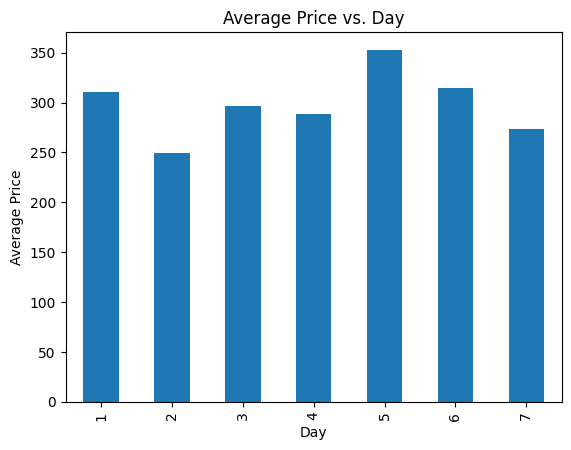

In [11]:
# bar plot by day of week
price_by_date[1:176].groupby(['day'])['price'].mean().plot(
    kind="bar", xlabel="Day", ylabel="Average Price", title="Average Price vs. Day")

Here we can see that Tuesday (2) is the cheapest with Friday (5) being the most expensive. 

## The month of the year

This plot shows how the month of the year affects flight prices.

<AxesSubplot: title={'center': 'Average Price vs. Month'}, xlabel='Month', ylabel='Average Price'>

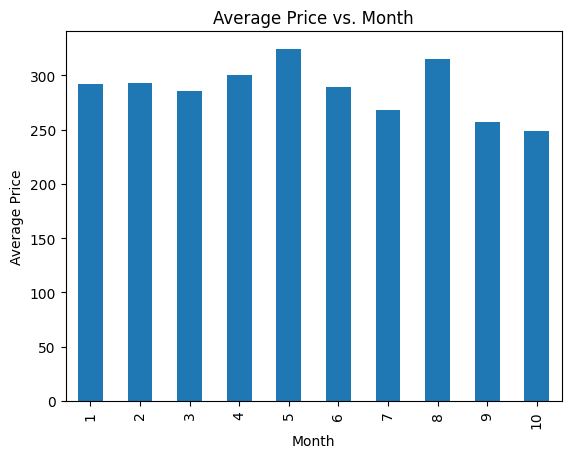

In [10]:
# bar plot by month
price_by_date[0:304].groupby(['month'])['price'].mean().plot(kind="bar", title="Average Price vs. Month", xlabel="Month", ylabel="Average Price")

# Assumed there would be a drop in pice month by month the farther you go away, but instead is correlated to month seasons


Here we can see that May (5) and August (8) are the most expensive with a gradual decline to October (10). This is surprising as I thought booking in the next month would be the most expensive with a decline but it seems to be the most expensive before and after the summer months.

<AxesSubplot: title={'center': 'Average Price vs. Days Ahead'}, xlabel='Days Ahead', ylabel='Average Price'>

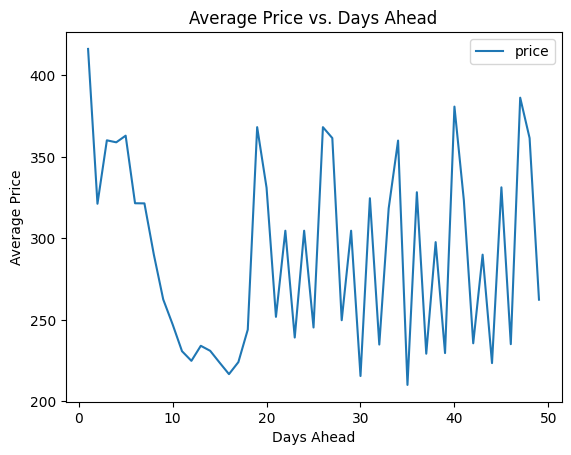

In [27]:
# bar plot by day of week
price_by_date[1:50].plot(y="price",
    kind="line", xlabel="Days Ahead", ylabel="Average Price", title="Average Price vs. Days Ahead")

There is a trend downwards from the closest date but then a repeating pattern throughout. This indicates that you should purchase a ticket at least 10 days in advance.

# Conclusions

Question 1: Which day of the week is the cheapest to fly?

According to the chart, the cheapest day to fly is on a Tuesday, and the most expensive on a Friday. Knowing this allows people to save money by simply flying on a Tuesday which is very useful. However, this does make sense as traveling before a weekend is more beneficial if you take time off as you have more time on vacation.

Question 2: Which month of the year is it the cheapest to fly?

This question is a bit less conclusive than the last. I assumed that it would be most expensive to fly for the next month and decline as the year went on however according to the data it only really alters in May and October. But nonetheless traveling outside of these months would be beneficial to know as a traveler.

Question 3: How many days in advance should you book?

As you can see above, the chart is cheapest after 10 days and slowly fluctuates accordingly. This means you should only book for a trip 10 days in advance.

Final conclusion:

To achieve the cheapest flight you should book your flight for a Tuesday at least 10 days in advance.


## Future Questions

Here are some questions that would be good to answer in the future.
- How would the day you book instead of flying affect the price?
- What does the effect of a domestic vs. international flight have on price?

# Resources

- Jay, A. (2022, November 6). Number of flights worldwide in 2022/2023: Passenger traffic, behaviors, and revenue. Financesonline.com. Retrieved January 8, 2023, from https://financesonline.com/number-of-flights-worldwide/ 
- The smart way to find cheap flights. Skiplagged. (n.d.). Retrieved January 8, 2023, from https://skiplagged.com/ 
- Search flights, Hotels &amp; Rental Cars. KAYAK. (n.d.). Retrieved January 8, 2023, from https://www.ca.kayak.com/ 
- Expedia travel: Vacations, Cheap Flights, airline tickets &amp; Airfares. Expedia.co.in. (n.d.). Retrieved January 8, 2023, from https://www.expedia.co.in/ 

### Tech Documentation

- Tutorials. Tutorials - Matplotlib 3.6.2 documentation. (n.d.). Retrieved January 8, 2023, from https://matplotlib.org/stable/tutorials/index.html 
- Pandas documentation. pandas documentation - pandas 1.5.2 documentation. (n.d.). Retrieved January 8, 2023, from https://pandas.pydata.org/docs/index.html 
- Selenium. (n.d.). Retrieved January 8, 2023, from https://www.selenium.dev/ 
- Beautiful Soup documentation. Beautiful Soup Documentation - Beautiful Soup 4.9.0 documentation. (n.d.). Retrieved January 8, 2023, from https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 
- W3Schools free online web tutorials. W3Schools Online Web Tutorials. (n.d.). Retrieved January 8, 2023, from https://www.w3schools.com/ 
